## Time Value of Money
For example, assume we have \\$1000 today which we store away safely, after one year the amount will be the same i.e. \\$1000. However, after one year the buying power of this \\$1000 would have reduced. To put it in a different way, the bundle of goods that we can buy with \$1000 today will not be the same after one year. **Inflation** reduces the buying power. For an annual inflation rate of 3%, we would lose \\$30 from \\$1000 leaving only \\$970 with us at the end of a year. Hence, even without taking any sort of risk we have acquired a loss of \\$30! This phenomenon is referred to as **Present Discounted Value** meaning uninvested cash is worth more today than that in the future. **Future Value** is the value of an asset in future on a specific date given a growth rate. For example, if we invest \\$1000 in a riskless sovereign bond which gives us a return of 5% annually, then after one year our \$1000 would be \\$1050. Here \\$1050 is the future value of the bond after a year. If we adjust the bond’s annual nominal return of \\$50 with an inflation of \\$30, we will get the annual real return of \\$20 on our invested amount of \\$1000.

![compounding](imgs/compounding.png)

**Compounding** requires period payments on investment, which are invested again. For example, assume that the 5% annual interest rate bond makes semiannual payments. That is, for an investment of \\$1000, we will get \\$25 after first 6 months. The rate of interest for first six months is 5% divided by 2, that is 2.5%, hence we get \\$25. For compounding effects, we would require to reinvest these \\$25 for the next six months. At the end of second half yearly period, we would earn an interest of \\$1025 * 2.5% that is \\$25.625, giving us an overall future value of \\$1025 + \\$25.625 that is \\$1050.625. Note, how we ended up earning \\$0.625 more in case of compounding for the same annual interest rate of 5%. An easy way to calculate the effect of compounding or interest earned on interest payments is to use this formula given below: 

$$Future\ Value = Present\ Value * (1 + \frac{r}{n})^{n*t}$$

Here: $r$ is the annual rate of interest earned and $n$ is the period of compounding. For example: n is equal to 2 in case of semiannual payments, 4 in case of quarterly payments and so on.


In [1]:
def get_future_value(rate,periods,years,present_value):
    future_value=((1+rate/periods)**(periods*years))*present_value
    return future_value

def get_present_value(rate,periods,years,future_value):
    present_value=future_value/(((1+rate/periods)**(years*periods)))
    return present_value

**Example**: Given a rate of 5%, calculate the PV (Present Value) of a \\$1000 cash flow that will be received in five years from today?

In [2]:
get_present_value(rate=0.05,periods=1,years=5,future_value=1000)

783.5261664684588

Assume that the 5% annual interest rate bond makes semiannual payments. That is, for an investment of \\$1000, you will get \\$25 dollars, after the first 6 months and another \\$25 after 1 year. The annual rate of interest is 5\%. What would be the FV, if I hold the bond for 1 year?

In [3]:
get_future_value(rate=0.05,periods=2,years=1,present_value=1000)

1050.625

### Annuity Payments
#### Funding a Future Obligation 

When it comes to funding a future obligation, it becomes necessary to determine the size of the deposit that must be made over a specified period, in order to meet that future liability. Let us assume that we have to make annual payments of say, \\$2500 for five years, five years down the timeline.  Let us assume that we have 4 years to save for this expense, such that we have an adequate fund at the end of the $5^{th}$ year to fulfil this obligation. 

![annuity1](imgs/annuity1.png)

The first thing we will do is discount all the \\$2,500 annuity obligations back to the end of the year 4 with r = 10%. The present value at the end of the year 4 is: 

$$PV=Annual\ Payments * \frac{1-(1+r)^{-n}}{r}$$

where $r$ is the interest rate, $n$ is the number of periods

$$PV=2500 * \frac{1-(1+0.1)^{-5}}{0.1} = \$9476.97$$

However, we are actually standing at the year 0 (the beginning). Hence, the PV that we just calculated is actually our FV for the year 0. We now need to calculate the annual outflows that we will make for 4 years, so that we have a lump
sum amount of \\$9476.96 at the end of the $4^{th}$ year or beginning of the $5^{th}$ year. 

$$Annual\ Payments = \frac{FV}{1+r}*\frac{r}{(1+r)^{n}-1}$$

$$Annual\ Payments = \frac{9476.96}{1+0.1}*\frac{0.1}{(1+0.1)^{4}-1} = \$1856.37$$

![annuity2](imgs/annuity2.png)

We will then invest this amount of \\$1856.37 at r = 10\% and take out \\$2500 at the end of every year, such that at the end of the $9^{th}$ year, the amount left with us will be \\$0. 

#### Funding a retirement plan 

Assume that a 30 year old investor wants to retire in another 25 years at the age of 55. Over the long term, the investor expects to earn 15\% on his investments prior to his retirement and 8\% thereafter. How much does the investor have to save at the end of every year for the first 25 years, such that he can withdraw \\$30,000 at the beginning of each year for the next 45 years till he is 100 years old? 

$$PV=30000 * \frac{1-(1+0.08)^{-45}}{0.08} = \$363252.05$$

$$Annual\ Payments = \frac{363252.05}{1+0.15}*\frac{0.15}{(1+0.15)^{25}-1} = \$1484.41$$

Hence we have to save \\$1484.41 at r = 15\% to be able to withdraw \\$30,000 after 25 years, for the next 45 years at r = 8\%. 

In [4]:
def present_value_from_annuity(annual_payment,rate,years):
    present_value=annual_payment*((1-((1+rate)**(-years)))/rate)
    return present_value

In [5]:
def annuity_from_future_value(future_value,rate,years):
    annuity=((future_value)/(1+rate))*(rate/(((1+rate)**years)-1))
    return annuity

What would be the annual periodic saving amount, if you want a lump sum of \\$9476.96 at the end of 3 years? The rate of return is 10\%? (Assuming the first payment is made at the start of each year).

In [6]:
annuity_from_future_value(rate=0.1,years=3,future_value=9476.96)

2602.8453721505048

What would be the PV, given a cash outflow of \\$2500 for a period of 5 years and rate of return being 10\%?

In [7]:
present_value_from_annuity(annual_payment=2500,rate=0.1,years=5)

9476.966923521126

In [8]:
import yfinance as yf
data = yf.download('AAPL', start="2020-01-01", end="2020-04-30")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,296.239990,300.600006,295.190002,300.350006,299.638885,33870100
2020-01-03,297.149994,300.579987,296.500000,297.429993,296.725769,36580700
2020-01-06,293.790009,299.959991,292.750000,299.799988,299.090149,29596800
2020-01-07,299.839996,300.899994,297.480011,298.390015,297.683533,27218000
2020-01-08,297.160004,304.440002,297.160004,303.190002,302.472137,33019800


In [9]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-03,242.800003,245.699997,238.970001,241.410004,241.410004,32470000
2020-04-06,250.899994,263.109985,249.380005,262.470001,262.470001,50455100
2020-04-07,270.799988,271.700012,259.000000,259.429993,259.429993,50721800
2020-04-08,262.739990,267.369995,261.230011,266.070007,266.070007,42223800
2020-04-09,268.700012,270.070007,264.700012,267.989990,267.989990,40529100


### Plotting Candlesticks
1. If the opening price is less than the closing price then a green candlestick is to be created to represent the day.
1. If the opening price is greater than the closing price then a red candlestick is to be created to represent the day.
1. We will use 'inc' and 'dec' as the variable to capture these two patterns in the code.

In [10]:
# Importing the necessary packages
import matplotlib.pyplot as plt
import mpl_finance as mpf
from mpl_finance import candlestick_ohlc
from bokeh.plotting import figure, show, output_file

# Indexing 
import pandas as pd
w = 12*60*60*1000 # half day in ms

data.index = pd.to_datetime(data.index)
df=data

inc = df.Close > df.Open
dec = df.Open > df.Close


# The various 'interactions' we want in our candlestick graph. This is an argument to be passed in figure () from bokeh.plotting

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

# Pan: It helps you pan/move the plot

# Wheel Zoom: You can zoom in using the wheel of your mouse

# Box Zoom: You can zoom in by creating a box on the specific area of the plot. Use the mouse, click and drag to create the box

# Reset: If you want to reset the visualisation of the plot

# Save: Saving the plot (entire or the part which you want) as an image file


# Passing the arguments of our bokeh plot

p = figure(x_axis_type="datetime", tools= TOOLS, plot_width=1000, title="SPY Candlestick")



from math import pi

# The orientation of major tick labels can be controlled with the major_label_orientation property.
# This property accepts the values "horizontal" or "vertical" or a floating point number that gives
# the angle (in radians) to rotate from the horizontal.

p.xaxis.major_label_orientation = pi/4


# Alpha signifies the floating point between 0 (transparent) and 1 (opaque).
# The line specifies the alpha for the grid lines in the plot.

p.grid.grid_line_alpha = 0.3


# Configure and add segment glyphs to the figure

p.segment(df.index,df.High,df.index,df.Low,color="red")


# Adds vbar glyphs to the Figure

p.vbar(df.index[inc],w,df.Open[inc],df.Close[inc], fill_color="#1ED837",line_color="black")
p.vbar(df.index[dec],w,df.Open[dec],df.Close[dec], fill_color="#F2583E",line_color="black")



# Generates simple standalone HTML documents for Bokeh visualization

output_file("candlestick.html", title="candlestick.py example")  


# The graph will open in another tab of the browser

show(p)

# The code ends here


# This is more of a 'helping' code that will help us to visualise the candlestick plot on our 'Quantra' portal

# Please run this twice or thrice if it gives an error in the first run 

from IPython.display import HTML
HTML("./candlestick.html")

c:\users\shaur\appdata\local\programs\python\python37\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


### Importing data from Quandl
To fetch data from Quandl, first import quandl. Here, quandl.get function is used to fetch data for a security over a specific time period.
```python
import quandl
from datetime import datetime

# quantrautil is a module specific to Quantra to fetch stock data
from quantrautil import get_quantinsti_api_key 
api_key = get_quantinsti_api_key()

data = quandl.get('EOD/AAPL', start_date='2017-1-1', end_date='2018-1-1', api_key= api_key)

# Note that you need to know the "Quandl code" of each dataset you download. In the above example, it is 'EOD/AAPL'.
# To get your personal API key, sign up for a free Quandl account. Then, you can find your API key on Quandl account settings page.

data.head()
```
### Importing data using pandas_datareader
First you need to import data from pandas_datareader module. Here data.get_data_yahoo function is used to return the historical price of a stock's ticker, over a specifc time range.
```python
# Yahoo recently has become an unstable data source.

# If it gives an error, you may run the cell again, or try again sometime later

import pandas as pd
from pandas_datareader import data
data = data.get_data_yahoo('AAPL', '2017-01-01', '2018-01-01')
data.head()
```

### 3D Plotting
Not many financial data visualisations benefit from 3-D plotting but one of the applications is the volatility surfaces showing implied volatilities simultaneously.

```python

```

In [11]:
# Random data creation using the numpy library

import numpy as np

strike_price = np.linspace (50,150,25) # Strike values between 100 to 150
time = np.linspace (0.5, 2, 25) # Time to maturity between 0.5 to 2.5 years

# The numpy's meshgrid() function helps us to create a rectangular grid out of an array of x values and y values

strike_price, time = np.meshgrid (strike_price, time)


In [12]:
strike_price, time [:] # Printing the mesh grid array

(array([[ 50.        ,  54.16666667,  58.33333333,  62.5       ,
          66.66666667,  70.83333333,  75.        ,  79.16666667,
          83.33333333,  87.5       ,  91.66666667,  95.83333333,
         100.        , 104.16666667, 108.33333333, 112.5       ,
         116.66666667, 120.83333333, 125.        , 129.16666667,
         133.33333333, 137.5       , 141.66666667, 145.83333333,
         150.        ],
        [ 50.        ,  54.16666667,  58.33333333,  62.5       ,
          66.66666667,  70.83333333,  75.        ,  79.16666667,
          83.33333333,  87.5       ,  91.66666667,  95.83333333,
         100.        , 104.16666667, 108.33333333, 112.5       ,
         116.66666667, 120.83333333, 125.        , 129.16666667,
         133.33333333, 137.5       , 141.66666667, 145.83333333,
         150.        ],
        [ 50.        ,  54.16666667,  58.33333333,  62.5       ,
          66.66666667,  70.83333333,  75.        ,  79.16666667,
          83.33333333,  87.5       ,  91.6

In [13]:
# generate fake implied volatilities

implied_volatility = (strike_price - 100) ** 2/ (100 * strike_price)/ time

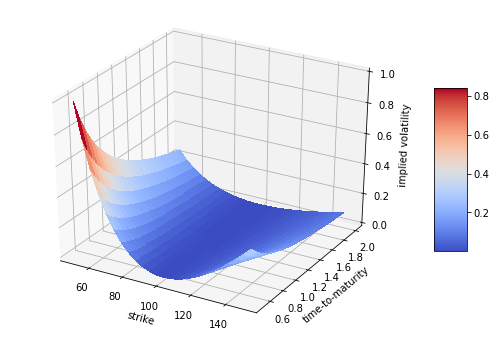

In [14]:
# Plotting a 3D figure

import matplotlib.pyplot as plt

# Importing the required packages for 3D plotting 
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure (figsize = (9,6))

# If 'fig' is a variable holding a figure, fig.gca() returns the axes associated with the figure. 
# With this 3 dimensional axes is enabled
axis = fig.gca (projection = '3d')

# To plot the surface and passing the required arguments
surface = axis.plot_surface (strike_price, time, implied_volatility, rstride = 1, cstride = 1, cmap = plt.cm.coolwarm, linewidth = 0.5, antialiased = False)

axis.set_xlabel ('strike')
axis.set_ylabel ('time-to-maturity')
axis.set_zlabel ('implied volatility')

# Adding a colorbar which maps values to colors
fig.colorbar (surface, shrink = 0.5, aspect=5)

plt.show()
